<img width="8%" alt="Naas.png" src="https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/.github/assets/logos/Naas.png" style="border-radius: 15%">

# Data.gouv.fr - Visualize schools

**Tags:** #Data.gouv.fr

**Author:** [Paul Gilbert](https://www.linkedin.com/in/paul-gilbert-410783aa/)

**Last update:** 2024-02-29 (Created: 2024_02_29)

**Description:** This notebook demonstrates how to extract schools information ("identifiant", "latitude" and "longitude" from Data.gouv.fr API and then visualize it on a map with plotly.express.

**References:**
- [Naas Documentation](https://site.naas.ai/)

## Input

### Import libraries

In [1]:
try:
    import pandas as pd
    import requests
    import json
    import plotly.express as px
    import kaleido

except:
    !pip install pandas 
    import pandas as pd
    !pip install requests
    import requests
    !pip install json
    import json
    !pip install plotly.express
    import plotly.express as px
    !pip install kaleido
    import kaleido
    

### Setup variables

**Mandatory**

- `response`: This variable represents the responsee we will have when we call the Data.gouv.fr API (if the response is not '200', then the API call is not working.

- `school_list`: This variable represents the list of information about each school gathered with Data.gouv.fr API

In [4]:
response = requests.get('https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/exports/json')
school_list = json.loads(response.text)

#### Check the response to make sure the API call works

In [5]:
response

<Response [200]>

## Model

### Get data from Data.gouv.fr

In [6]:
#first creation of an empty dataframe with latitude and longitude columns
df_schools = pd.DataFrame(columns=['latitude', 'longitude'])


#loop through school list to gather latitude and longitude information and to put it in the dataframe
for i in range(len(school_list)):
    if school_list[i]['position'] is not None:
        df_i = pd.DataFrame([[school_list[i]['position']['lat'], school_list[i]['position']['lon']]], columns=['latitude', 'longitude'])
        df_schools = pd.concat([df_schools, df_i]).reset_index(drop=True)


#display of the df_schools         
df_schools

latitude  longitude
0      43.572497   7.009613
1      43.726352   7.287770
2      43.697761   7.283160
3      43.758997   7.479260
4      43.621076   7.043500
...          ...        ...
67752  44.828580  -0.674224
67753  48.586699   7.761006
67754  46.179116   6.214689
67755  43.931519   4.773522
67756  16.240230 -61.593020

[67757 rows x 2 columns]

## Output

### Save DataFrame to csv

In [7]:
df_schools.to_csv('df_schools.csv', index=False)

### visualize the schools on a map with plotly.express

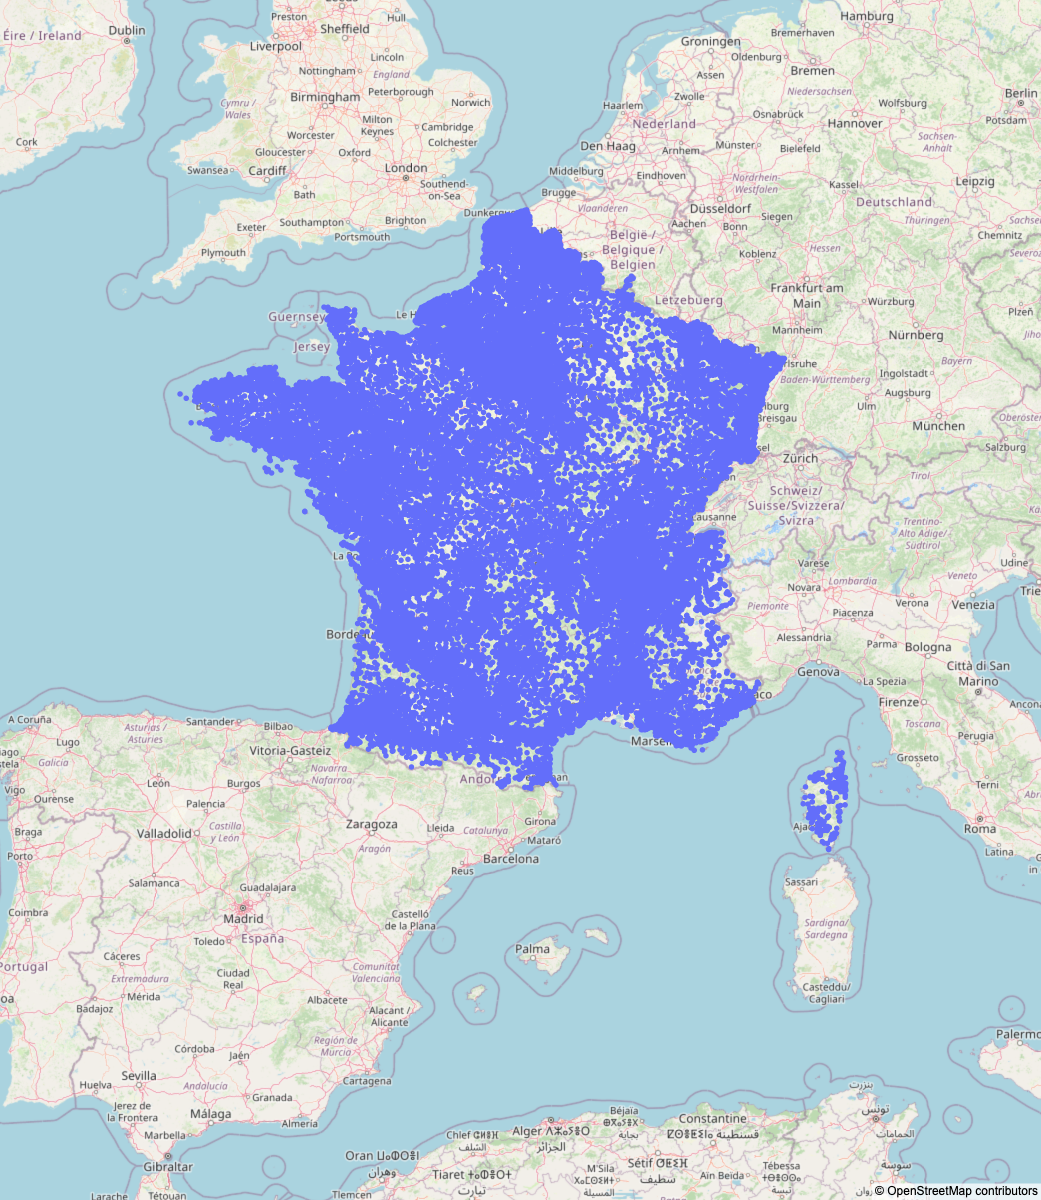

In [23]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_schools, 
                        lat="latitude", 
                        lon="longitude",
                        color_continuous_scale=color_scale,
                        zoom=5, 
                        height=1200,
                        width=1200)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### save the map as jpeg file

In [10]:
fig.write_image("school_map.jpeg")